In [36]:
"""Iris Binary Classification"""

import tensorflow as tf
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [37]:
# Load the iris data
# iris.target = {0, 1, 2}, where '0' is setosa
# iris.data ~ [sepal.width, sepal.length, pedal.width, pedal.length]

# we are classifying with pedal.width and pedal.length

iris = datasets.load_iris()
binary_target = np.array([1. if x == 0 else 0. for x in iris.target])

iris_2d = np.array([[x[2], x[3]] for x in iris.data])

batch_size = 20
learning_rate = 0.05

# Placeholders
# Declare placeholders
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Model Variables
# Create variables A and b
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

Model Operations

A line can be defined as $x_{1}=A\cdot x_{2} + b$. To create a linear separator, we would like to see which side of the line the data points fall. There are three cases:
A point exactly on the line will satisfy: $0 = x_{1} - (A\cdot x_{2} + b)$
A point above the line satisfies: $0 &gt; x_{1} - (A\cdot x_{2} + b)$
A point below the line satisfies: $0 &lt; x_{1} - (A\cdot x_{2} + b)$
We will make the output of this model:
$$x_{1} - (A \cdot x_{2} + b)$$
Then the predictions will be the sign of that output:
$$Prediction(x_{1},x_{2}) = sign(x_{1} - (A \cdot x_{2} + b))$$
So we add the corresponding operations to the computational graph.

In [38]:
# Add model to graph:
# x1 - A*x2 + b
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)


Step #200 A = [[ 8.74117851]], b = [[-3.57363701]]
Step #400 A = [[ 10.26586246]], b = [[-4.67667913]]


Step #600 A = [[ 11.17514992]], b = [[-5.49885178]]
Step #800 A = [[ 11.92781734]], b = [[-5.92623281]]


Step #1000 A = [[ 12.39235878]], b = [[-6.45340538]]


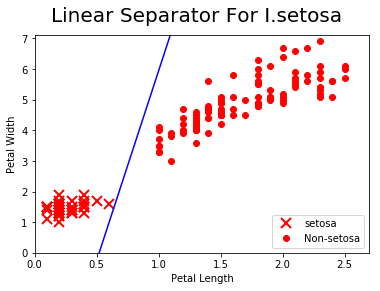

In [39]:
# Add classification loss (cross entropy)
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Run Loop
    for i in range(1000):
        rand_index = np.random.choice(len(iris_2d), size=batch_size)
        # rand_x = np.transpose([iris_2d[rand_index]])
        rand_x = iris_2d[rand_index]
        rand_x1 = np.array([[x[0]] for x in rand_x])
        rand_x2 = np.array([[x[1]] for x in rand_x])
        #rand_y = np.transpose([binary_target[rand_index]])
        rand_y = np.array([[y] for y in binary_target[rand_index]])
        sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
        if (i + 1) % 200 == 0:
            print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

    # Pull out slope/intercept
    [[slope]] = sess.run(A)
    [[intercept]] = sess.run(b)

    # Create fitted line
    x = np.linspace(0, 3, num=50)
    ablineValues = []
    for i in x:
        ablineValues.append(slope * i + intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()
